# Цифровая обработка сигналов - 2

| **Title**         | Digital signal processing |
| --- | --- |
| **Author**        | Alexander Kapitanov       |
| **Contact**       | sallador@bk.ru            |
| **Project lang**  | Python                    |
| **Packages**      | numpy, scipy, matplotlib  |
| **License**       | GNU GPL 3.0               |


## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.

## Спектр сигнала

Из предыдущей части вы узнали, что *сигнал* - это физический процесс во времени, параметры которого изменяются в соответствии с передаваемым сообщением. Мы научились представлять дискретные (цифровые) сигналы во времени. В этом разделе будет показан переход между временной и частотной областями для дискретных сигналов.

### Прямое преобразование Фурье

Чтобы преобразовать сигнал из временной области в частотную и обратно необходимо выполнить операцию под названием дискретное **преобразование Фурье**.

Запишем формулу прямого преобразования Фурье для дискретной последовательности x(nT). Прямым дискретным преобразованием Фурье (ДПФ) называется преобразование последовательности  `x(n), n = 0, ... , N–1` в последовательность `X(k), k = 0, ..., N–1` по следующей формуле:

$X(k) = \sum_{n=0}^{N-1}x(nT)\cdot e^{(-2\pi j\cdot nk/N)} = \sum_{n=0}^{N-1}x(nT)\cdot W^{-nk}$  

где $k = 0, ..., N-1$.

- $N$ – количество компонент разложения, число измеренных за период значений сигнала;
- $n$ – номер отсчета дискретизированного сигнала, n = 0,1, ... , N–1;	
- $k$ – номер гармоники компонента преобразования, а T — период времени, в течение которого брались входные данные; 
- $W = e^{-2\pi j / N}$ – поворотный множитель.

В этой формуле $X(kT) = X(e^{j\omega T})$ является спектральной плотностью (спектром) дискретной последовательности. Выражение для спектра дискретной последовательности можно найти, заменив в её Z-форме переменную $z = e^{j\omega T}$  

Для аналоговых сигналов выражение суммы превращается в интеграл.

Используя **формулу Эйлера** $e^{j\omega T} = cos(\omega T) + j·sin(\omega T)$, можно определить *вещественную* и *мнимую* составляющие, а также **модуль** и **аргумент** спектральной плотности, которые связаны с вещественной и мнимой частями спектра через формулы теории функции комплексного переменного. 

Модуль:  

$|X(kT)| = \sqrt{Re(X)^2 + Im(X)^2}$ 

Фаза:  

$arg(X(kT)) = \arctan{\frac{Im(X)}{Re(X)}}$ 

Таким образом, ДПФ для $N$ входных отсчетов сигнала ставит в соответствие N спектральных отсчётов. Из формулы ДПФ для вычисления одного спектрального отсчета требуется N операций комплексного умножения и сложения. Поскольку таких операций $N$, то общая вычислительная сложность ДПФ равна $N^2$

### Обратное преобразование Фурье

**Обратное дискретное преобразование Фурье** (ОДПФ) есть перевод последовательности `X(k), k = 0, ..., N–1` в последовательность `x(n), n = 0, ... , N–1` по формуле:

$x(nT) = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot e^{(2\pi j\cdot nk/N)} = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot W^{nk}$  


где `x(n)` –  измеренная последовательность в дискретных временных точках, значения которой являются исходными данными для прямого преобразования и выходными для обратного
`X(k)` – N–последовательность комплексных амплитуд синусоидальных сигналов, образующих исходный сигнал `x(n)`; значения последовательности являются выходными данными для *прямого* преобразования и входными для *обратного*

Поскольку амплитуды спектральных отсчетов - комплексные величины, то по ним можно вычислить одновременно и амплитуду, и фазу сигнала.

____

Как следует из теоремы **Найквиста-Котельникова**, ДПФ точно соответствует непрерывному преобразованию Фурье, если преобразуемая функция есть функция с ограниченным спектром, при этом частота дискретизации **Fд** должна быть не меньше удвоенной максимальной частоты спектра **Fв**. Следует отметить, что для ДПФ справедливы правила и свойства, которые были рассмотрены для Z-преобразования. Матрицей `k * n` элементов можно определить ДПФ. 

____

### Особенности спектров дискретных сигналов.  
1. Спектральная плотность дискретного сигнала – периодическая функция с периодом, равным частоте дискретизации.

2. Если дискретная последовательность **вещественная**, то модуль спектральной плотности такой последовательности есть **четная** функция, а аргумент – **нечетная** функция частоты. 

3. При сдвиге спектра $X(e^{j\omega T})$ последовательности $x(nT)$ по оси частот вправо на величину $\psi$ получим спектр $Y(e^{j\omega T}) = Y(e^{j(\omega-\psi) T})$ Такому спектру соответствует комплексная последовательность:

$y(nT) = e^{j\psi nT} \cdot x(nT) = \cos{(\psi nT)} \cdot x(nT) + j \sin{(\psi nT)} \cdot x(nT)$

Сдвиг спектра $X(e^{j\omega T})$ последовательности $x(nT)$ по оси частот влево на величину $\psi$ происходит путем умножения последовательности $x(nT)$ на комплексную экспоненту $e^{j\psi nT}$

4. При сдвиге дискретного сигнала $x(nT)$ **вправо** по временной оси на m тактов (реализация задержки) получаем сигнал $x(n) = x(nT - mT)$, Z-преобразование и спектральная плотность которого имеют вид:

$Z[y(nT)] = Z[x(nT-mT)] = X(z)\cdot z^{-m}$  

$Y(\omega) = e^{-j\omega mT} \cdot X(e^{j\omega T})$  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

%matplotlib inline

Пример. Найдите модуль и аргумент спектральной плотности для следующей последовательности `x(nT) = {1, 2, 0, 1}`.

В библиотеке scipy есть пакет **fftpack**, который содержит основные функции для вычисления ДПФ (в частности БПФ).

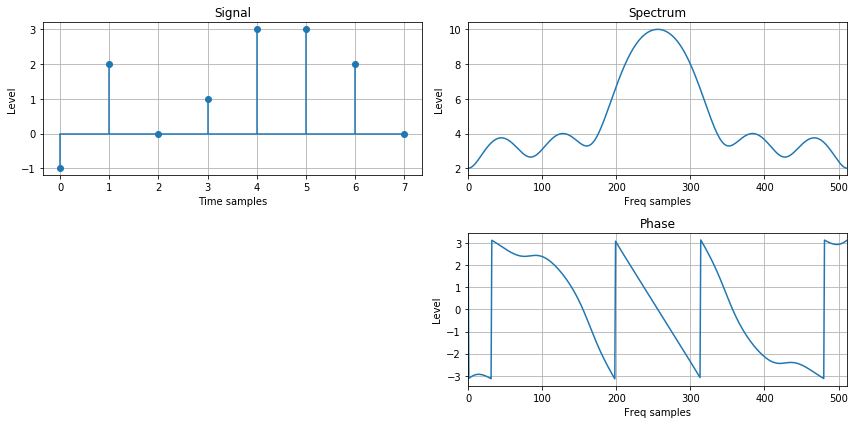

In [2]:
# signal
x = np.array([-1, 2, 0, 1, 3, 3, 2, 0])
# Z-form: X(z) = 1 + 2z^(-1)+z^(-3), where z = exp(-jwT)

# Forward FFT
N = 512
xFFT = fftshift(fft(x, N))
# Magnitude spectrum
xA = np.abs(xFFT)
# Phase spectrum
xF = np.angle(xFFT)

# List of signals
xT = [x, xA, xF]
lst_title = ['Signal', 'Spectrum', 'Phase']

# Plot results
fig = plt.figure(figsize=(12, 6))
for i, sig in enumerate(xT):
    plt.subplot(2, 2, int(2**i))
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
    else:
        plt.plot(sig)
        plt.xlabel('Freq samples')
        plt.xlim([0, N-1])
    plt.grid()
plt.tight_layout()

### Свойства дискретного преобразования Фурье

1. **Линейность**: сумма спектров сигналов равна спектру суммы сигналов. 

Это свойство говорит о том, что спектр суммы независимых дискретных сигналов равен сумме спектров этих сигналов, а при умножении дискретного сигнала на константу, его спектр также умножается на эту константу.

2. **Сдвиг по отсчетам** (по времени)

Циклический сдвиг сигнала на m отсчётов приводит к повороту фазового спектра, а амплитудный спектр при этом не изменяется. 

$X'(k) = X(k) \cdot e^{- \frac{2\pi j}{N} k m} $

3. **ДПФ от чётных и нечётных функций** 

ДПФ четной функции вырождается в косинусное преобразование Фурье  

$X(k) = \sum_{n=0}^{N-1}x(n)\cdot \cos{(2\pi nk/N)}$

ДПФ нечетной функции вырождается в синусное преобразование Фурье  

$X(k) = \sum_{n=0}^{N-1}x(n)\cdot \sin{(2\pi nk/N)}$

где $k = 0, ..., N-1$.

4. **ДПФ циклической свёртки сигналов** 

Для сигнала $x(n)$, который является результатом циклической свертки двух сигналов $a(b)$ и $b(n)$:  

$x(n) = \sum_{m=0}^{N-1}a(n)\cdot b(n-m)$

N-точечное ДПФ последовательности равно:  

$X(k) = A(k) \cdot B(k)$ ,  

где $A(k), B(k)$ - спектры сигналов. 

Таким образом, спектр циклической свертки двух сигналов равен произведению спектров этих сигналов. Это свойство позволяет использовать быстрые алгоритмы ДПФ для вычисления свертки.

5. **ДПФ произведения сигналов** 

Для сигнала $x(n)$, который является результатом произведения двух сигналов $a(b)$ и $b(n)$ спектр равен:

$X(k) = \frac{1}{N} \sum_{m=0}^{N-1}A(m)\cdot B(k-m)$

Спектр произведения двух сигналов представляет собой циклическую свертку спектров этих сигналов.

6. **Сдвиг по частоте** 

Аналогично второму свойству (временной сдвиг), если имеется сдвинутый по частоте на m спектр $X(k–m)$, то после ОДПФ последовательность $x(n)$ принимает следующий вид:  

$x'(n) = x(n)\cdot e^{\frac{2\pi j}{N} k m}$ 

Отсюда следует, что сдвиг спектра осуществляется умножением сигнала на комплексную экспоненту. Это свойсто используется для переноса частот по диапазону. Заметим, что после умножения на экспоненту сигнал будет комплексным, а его спектр перестанет быть симметричным.

7. **Теорема Парсеваля** 

Средняя мощность дискретизированной функции времени равна сумме мощностей отдельных спектральных составляющих и не зависит от их фаз. 

Нормированная энергия сигнала $x(n)^2$ равна:

$\sum_{n=0}^{N-1}x^{2}(n) = \frac{1}{N} \sum_{n=0}^{N-1} |{X^{2}(k)}|$  


Как видно, свойства ДПФ имеют свойство двойственности, которое заключается в том, что все свойства ДПФ справедливы как для сигнала, так и для спектра. 

____

### Спектр гармонического сигнала

Покажем, как выглядит спектр гармонического сигнала. Для этого зададимся длиной БПФ `N = 32` отсчёта. Посмотрим, что происходит при вычислении ОБПФ для сигнала, который задан в частотной области в виде единичного отсчета на определенной позиции.

Обратите внимание, что вычисляется прямое БПФ, поскольку операции БПФ и ОБПФ равнозначны и отличаются на константу и знак в поворачивающих множителях.

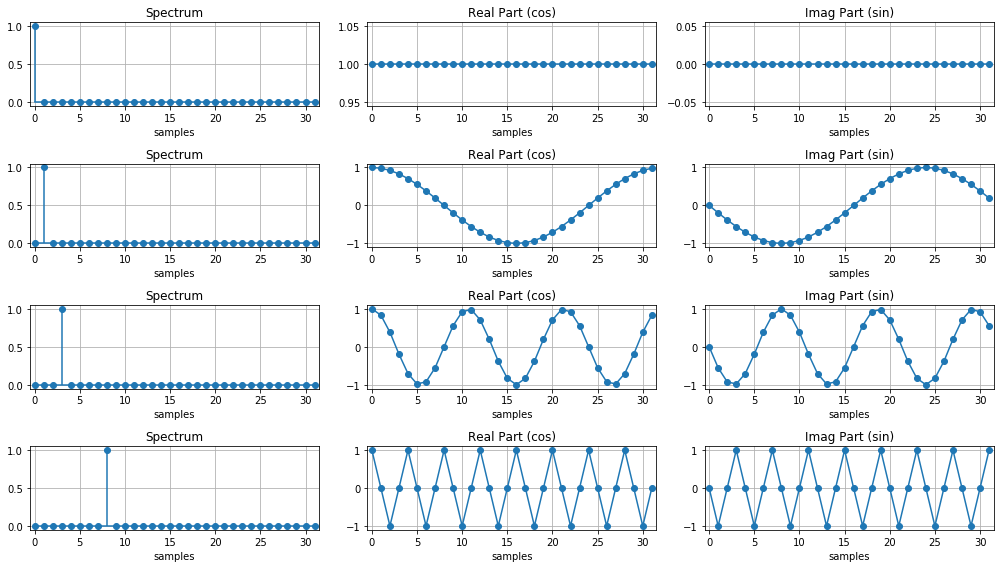

In [3]:
N, M = 32, 4

# Create freq signal
x = np.zeros((N,M))
x[0][0] = 1
x[1][1] = 1
x[3][2] = 1
x[8][3] = 1

# Calculate FFT
X = fft(x, axis=0)

# Plot results
fig = plt.figure(figsize=(14, 8))
for i in range(M*3):
    plt.subplot(4, 3, i+1)
    if i % 3 == 0:
        plt.title('Spectrum')
        plt.stem(x[:,i//3], use_line_collection=True, basefmt='C0')
    if (i-1) % 3 == 0:
        plt.title('Real Part (cos)')
        plt.plot(np.real(X[:,i//3]), '-o')
    if (i-2) % 3 == 0:
        plt.title('Imag Part (sin)')
        plt.plot(np.imag(X[:,i//3]), '-o')      
    plt.xlim([-0.5, N-0.5])
    plt.xlabel('samples')
    plt.grid()
plt.tight_layout()

### Спектр суммы гармонических сигналов

Покажем, как выглядит спектр суммы гармонических сигналов (работает **аддитивный закон**: спектр суммы сигналов равен сумме спектров сигналов).

Сигнал состоит из трех гармонических компонент.  
Амплитуды гармоник: `A1, A2, A3 = 5, 1, 3`  

Частоты гармоник: `f1, f2, f3 = 2, 7, 12`  

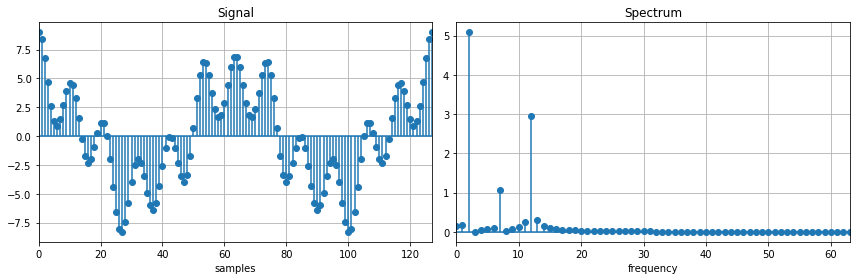

In [4]:
N = 128
# Time vector
t = np.linspace(0, 1, N)

# Amplitudes and freqs
f1, f2, f3 = 2, 7, 12
A1, A2, A3 = 5, 1, 3

# Signal
x = A1 * np.cos(2*np.pi*f1*t) + A2 * np.cos(2*np.pi*f2*t) + A3 * np.cos(2*np.pi*f3*t)

# Calculate FFT
X = fft(x)
X = 2*np.abs(X) / N

# Plot results
fig = plt.figure(figsize=(12, 4))
# Time: signal
plt.subplot(1, 2, 1)
plt.title('Signal')
plt.stem(x, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('samples')
plt.grid()

# Freq: Spectrum
plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.stem(X, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()

### Периодическая последовательность

Посмотрим, как изменится спектральная плотность периодической последовательности `x(nT)`, если её повторить $M$ раз через определенное число тактов с периодом $N$, где $M$ – количество повторений дискретной последовательности.

В качестве примера возьмем последовательность `x(nT) = {1, 1, 1}, M = 4, N = 9`.

In [5]:
N = 9    # Signal period
M = 4    # Number of repeats

# Signal
x = np.zeros(N)
x[0:3] = 1
y = np.tile(x, M)
y

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0.])

Max amplitude = sum of ones * M = 12.0


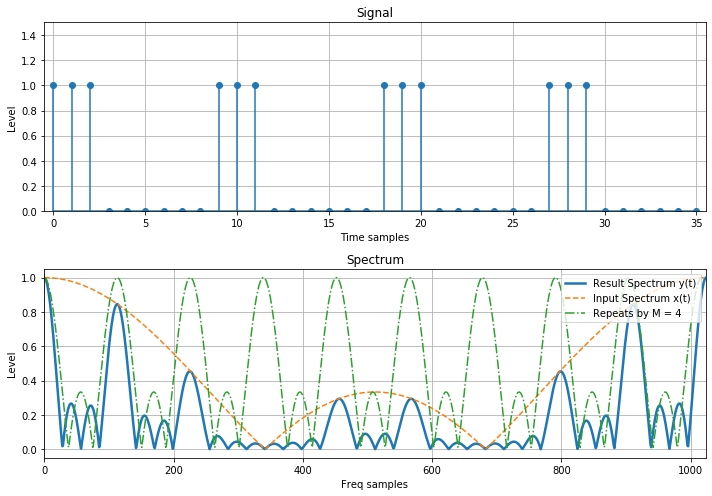

In [6]:
# Forward FFT
NFFT = 1024
xFFT = fft(y, NFFT)
# Magnitude spectrum
yA = np.abs(xFFT)
print('Max amplitude = sum of ones * M = {}'.format(yA.max()))
yA /= np.max(yA)
# Phase spectrum
yF = np.angle(xFFT)


# FFT for input signal
xFFT = fft(x, NFFT)
# Magnitude spectrum
xA = np.abs(xFFT)
xA /= np.max(xA)

# FFT for repeats
xFFT = fft(x, NFFT//N)
# Magnitude spectrum
xM = np.abs(xFFT)
xM /= np.max(xM)
xM = np.tile(xM, N)
#List of signals
xT = [y, yA]
lst_title = ['Signal', 'Spectrum', 'Phase']

# Plot results
fig = plt.figure(figsize=(10, 7))
for i, sig in enumerate(xT):
    plt.subplot(2, 1, int(2**i))
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
        plt.ylim([0, 1.5])
        plt.xlim([-0.5, N*M-0.5])
    else:
        
        plt.plot(sig, '-', linewidth=2.5, label='Result Spectrum y(t)')
        plt.plot(xA, '--', linewidth=1.5, label='Input Spectrum x(t)')
        plt.plot(xM, '-.', linewidth=1.5, label='Repeats by M = %d' % M)
        plt.xlabel('Freq samples')
        plt.xlim([0, NFFT-1])
        plt.legend(loc='upper right')
    plt.grid()
plt.tight_layout()

На нулевой частоте модуль спектра численно равен сумме количества отсчетов непериодической последовательности `N = 3`. После перемножения двух спектров, получим результирующий спектр периодической последовательности. Уровень сигнала на нулевой частоте равен сумме единичных импульсов, а т.к. последовательность периодична, это можно записать через формулу: 

$A_0 = \sum_{n=0}^{NM}x(nT)$

Таким образом, чтобы получить итоговый спектр периодической последовательности, необходимо проделать следующие шаги:
1. Разделить интервал на N частей (период сигнала),
2. Каждую часть интервалов разбить на M частей (период повторения),
3. Найти модуль спектра множителя повторения | M(ejωT) |,
4. Найти спектр исходной последовательности  | X(ejωT) |,
5. Перемножить спектры | M(ejωT) | и | X(ejωT) |, получив спектр периодической последовательности с периодом N и числом повторений М.

____

### Поворотные множители
Коэффициенты матрицы ДПФ (*twiddle factor*) или поворотные множители $W_{nk}$ можно найти по следующей формуле:

$W_{k,n} = e^{\frac{-2\pi j}{N}nk}$  

Таким образом, матрица ДПФ без учета нормирующего множителя устроена так: первые строка и столбец состоят из единиц, во второй строке стоят корни из единицы порядка n в естественном порядке, следующие строки являются последовательными степенями второй строки. В качестве примера приведем матрицу размерностью 4х4.


In [7]:
N = 4
nk = np.array([i*j for i in range(N) for j in range(N)]).reshape(N, N)

# Twiddle
Wnk = np.round(np.exp(-2j*np.pi*nk/N), 3)
print(Wnk)

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.-1.j -1.-0.j -0.+1.j]
 [ 1.+0.j -1.-0.j  1.+0.j -1.-0.j]
 [ 1.+0.j -0.+1.j -1.-0.j  0.-1.j]]


Построим графики реальной и мнимой части матрицы поворачивающих множителей при `N = 8`.

[[ 1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j
   1.   +0.j     1.   +0.j     1.   +0.j   ]
 [ 1.   +0.j     0.707-0.707j  0.   -1.j    -0.707-0.707j -1.   -0.j
  -0.707+0.707j -0.   +1.j     0.707+0.707j]
 [ 1.   +0.j     0.   -1.j    -1.   -0.j    -0.   +1.j     1.   +0.j
   0.   -1.j    -1.   -0.j    -0.   +1.j   ]
 [ 1.   +0.j    -0.707-0.707j -0.   +1.j     0.707-0.707j -1.   -0.j
   0.707+0.707j  0.   -1.j    -0.707+0.707j]
 [ 1.   +0.j    -1.   -0.j     1.   +0.j    -1.   -0.j     1.   +0.j
  -1.   -0.j     1.   +0.j    -1.   -0.j   ]
 [ 1.   +0.j    -0.707+0.707j  0.   -1.j     0.707+0.707j -1.   -0.j
   0.707-0.707j -0.   +1.j    -0.707-0.707j]
 [ 1.   +0.j    -0.   +1.j    -1.   -0.j     0.   -1.j     1.   +0.j
  -0.   +1.j    -1.   -0.j    -0.   -1.j   ]
 [ 1.   +0.j     0.707+0.707j -0.   +1.j    -0.707+0.707j -1.   -0.j
  -0.707-0.707j -0.   -1.j     0.707-0.707j]]


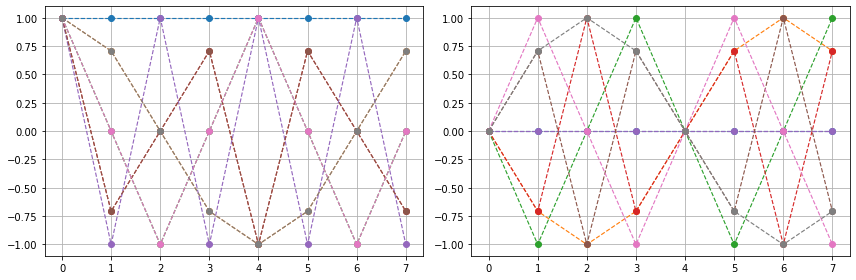

In [8]:
N = 8
nk = np.array([i*j for i in range(N) for j in range(N)]).reshape(N, N)

# Twiddle
Wnk = np.round(np.exp(-2j*np.pi*nk/N), 3)
print(Wnk)

fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for i in range(N):
    plt.plot(np.real(Wnk[i,:]), '--o', linewidth=1.15)
plt.grid(True)
plt.subplot(1, 2, 2)
for i in range(N):
    plt.plot(np.imag(Wnk[i,:]), '--o', linewidth=1.15)
plt.grid(True)
plt.tight_layout()

Построим графики *реальной части* матрицы поворачивающих множителей при `N = 16`.

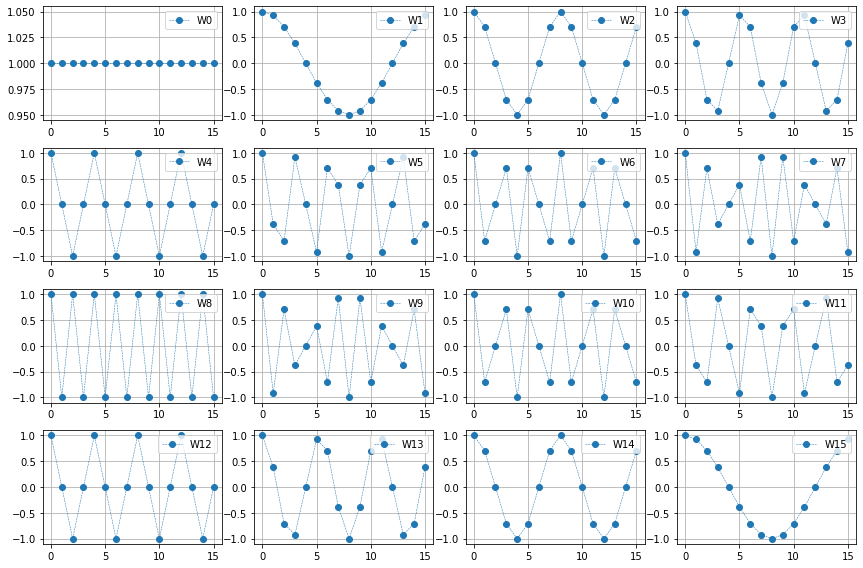

In [9]:
N = 16
nk = np.array([i*j for i in range(N) for j in range(N)]).reshape(N, N)

# Twiddle
Wnk = np.round(np.exp(-2j*np.pi*nk/N), 5)

fig = plt.figure(figsize=(12, 8))
for i in range(N):
    plt.subplot(N//4, 4, i+1)
    plt.plot(np.real(Wnk[i,:]), '--o', linewidth=0.5, label='W{}'.format(i))
    plt.grid(True)
    plt.legend(loc='upper right')
plt.tight_layout()

### Переход от ДПФ к БПФ

Преобразование Фурье лежит в основе методов свертки и проектировании цифровых корелляторов, активно применяется при спектральном анализе, используется при работе с длинными числами. Однако до появления компьютеров ДПФ использовалось редко, поскольку вычисление ДПФ даже для 64 отсчетов требует 4096 операции комплексного умножения и практически столько же операций сложения, что вручную считать довольно долго и трудоемко. Для N = 1024 потребуется около миллиона операций комплексного умножения и миллион операций комплексного умножения. Чем больше точек вычисления (чем больше длина ДПФ), тем больше времени затрачивается на вычисления в связи с увеличением количества операций.

Вычисление преобразования Фурье по стандартной формуле предполагает выполнение *большого числа операций сложения и умножения*. Очевидно, что возникает необходимость разработать алгоритмы, которые уменьшают число математических действий при расчёте ДПФ. 

Следует заметить что, вычислять ДПФ напрямую не обязательно и можно обойтись существенно меньшим числом операций. Рассмотрим основную идею БПФ, которая состоит в разбиении исходной N–мерной последовательности $x(n), n = 0, ... , N–1$ на части. При этом для каждой части можно вычислить ДПФ отдельно, а затем линейно просуммировать с остальными, чтобы получить исходное преобразование. В свою очередь, эти части меньшего размера можно разбить на ещё меньшие части, и проделать те же самые операции.  

Пусть длина периодической последовательности равна $N$ , тогда для вычисления одного спектрального отсчета потребуется $N$ операций комплексного умножения и сложения. Таким образом, общая вычислительная сложность алгоритма ДПФ составит $N^2$ умножений и сложений. Если разделить исходную последовательность на две равные части по $N/2$ элементов, то для выполнения вычисления преобразования по классической формуле на каждом этапе потребуется в **два раза меньше** операций сложения и умножения.  

При этом каждое из N/2–точечных ДПФ также можно вычислить путем замены $N/2$–точечного ДПФ на два $N/4$–точечных. В этом случае количество операций комплексного сложения и умножения уменьшается еще в два раза. Суть данного алгоритма ДПФ заключается в том, что можно продолжать разбиение исходной последовательности до тех пор, пока возможно целочисленное деление последовательности на двойку. Понятно, что если длина входной последовательности $N = 2m$, где $m$  – положительное целое число, то исходную последовательность можно разделить пополам всего m раз. Алгоритмы БПФ, с длиной последовательности $N = 2m$, называются **алгоритмы БПФ по основанию 2** (Radix-2 FFT).  

Эффективность алгоритма БПФ полностью зависит от способа разбиения и объединения последовательности. Очевидно, что делить последовательности на две части можно по-разному, однако от этого зависит, сможем ли мы при объединении получить неискаженный спектр сигнала и чего с точки зрения вычислительных затрат и объема использования ресурсов это будет нам стоить. Количество операций БПФ линейно зависит от длины последовательности $N$. 


### Сравнение эффективности

Ниже представлена таблица, показывающая сравнение эффективности алгоритмов БПФ в сравнении с ДПФ. Эффективность алгоритма БПФ и количество выполняемых операций линейно зависит от длины последовательности N

<table>
    <thead>
        <tr>
            <th rowspan=2>N</th>
            <th colspan=2>ДПФ</th>
            <th colspan=2>БПФ</th>
            <th rowspan=2>Отношение числа комплексных сложений</th>
            <th rowspan=2>Отношение числа комплексных умножений</th>
        </tr>
        <tr>
            <th>Число операций умножения</th>
            <th>Число операций сложения</th>
            <th>Число операций умножения</th>
            <th>Число операций сложения</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>2</td>
            <td>4</td>
            <td>2</td>
            <td>1</td>
            <td>2</td>
            <td>4</td>
            <td>1</td>
        </tr>
        <tr>
            <td>4</td>
            <td>16</td>
            <td>12</td>
            <td>4</td>
            <td>8</td>
            <td>4</td>
            <td>1.5</td>
        </tr>
        <tr>
            <td>8</td>
            <td>64</td>
            <td>56</td>
            <td>12</td>
            <td>24</td>
            <td>5.3</td>
            <td>2.3</td>
        </tr>
        <tr>
            <td>16</td>
            <td>256</td>
            <td>240</td>
            <td>32</td>
            <td>64</td>
            <td>8</td>
            <td>3.75</td>
        </tr>
        <tr>
            <td>32</td>
            <td>1024</td>
            <td>992</td>
            <td>80</td>
            <td>160</td>
            <td>12.8</td>
            <td>6.2</td>
        </tr>
        <tr>
            <td>64</td>
            <td>4096</td>
            <td>4032</td>
            <td>192</td>
            <td>384</td>
            <td>21.3</td>
            <td>10.5</td>
        </tr>
        <tr>
            <td>128</td>
            <td>16384</td>
            <td>16256</td>
            <td>448</td>
            <td>896</td>
            <td>36.6</td>
            <td>18.1</td>
        </tr>
        <tr>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
        </tr>
        <tr>
            <td>4096</td>
            <td>16777216</td>
            <td>16773120</td>
            <td>24576</td>
            <td>49152</td>
            <td>683</td>
            <td>341</td>
        </tr> 
        <tr>
            <td>8192</td>
            <td>67108864</td>
            <td>67100672</td>
            <td>53248</td>
            <td>106496</td>
            <td>1260</td>
            <td>630</td>
        </tr>
    </tbody>
</table>

Из таблицы видно, что использование БПФ существенно экономит на количестве операций, причем, чем больше длина последовательности N, тем больше экономия.  

Например, для $N = 8192$ отсчётов при вычислении ДПФ потребуется 67 миллионов операций комплексного сложения и умножения! Используя алгоритмы БПФ, можно снизить эти числа в $~1260$ и $~630$ раз соответственно!!

### Алгоритмы БПФ

Существует два основных метода вычисления БПФ по основанию 2 (Radix-2): с прореживанием (или децимацией) по **частоте** и по **времени**. Рассмотрим оба варианта.  

Рассмотрим первый способ разбиения последовательности – прореживание по времени, который также называют алгоритмом БПФ с «децимацией по времени» **FFT Decimation-in-time [DIT]**. Идея заключается в том, что исходная последовательность отсчётов $x(n)$ с длиной N разбивается на две последовательности $x0(n)$ и $x1(n)$ равной длины $N/2$. 

Причем $x0(n)$ - последовательность четных отсчетов -  

$x0(n) = x(2n), n = 0, ..., N/2 - 1$  

а $x1(n)$ - последовательность нечетных отсчетов -  

$x1(n) = x(2n+1), n = 0, ..., N/2 - 1$

Минуя математические выкладки (их можно найти в любой литературе по цифровой обработке сигналов), запишем основные правила вычисления БПФ путём разбиения последовательности на четные и нечетные.

**Алгоритм БПФ с децимацией по времени**:
- осуществить двоично-инверсную перестановку отсчетов входного сигнала, обеспечив разбиение исходной последовательности;
- сделать N/2 операций «Бабочка» для получения первого объединения, используя поворотные коэффициенты;
- повторить операцию «Бабочка» для перехода на следующие этапы, также используя поворотные коэффициенты.

После всех вышеописанных действий получим на выходе ДПФ входной последовательности. 

«Бабочка» - направленный граф, с помощью которого вычисляется пара комплексных отсчетов по предыдущим значениям. Для БПФ с прореживанием по времени бабочка по основанию 2 записывается по формуле:

$ X = A + B\cdot W^{-k}_{N}$ 

$ Y = A - B\cdot W^{-k}_{N}$ 

В алгоритме БПФ с децимацией по времени производилось разделение исходного сигнала в соответствии с двоично-инверсной перестановкой – на четные и нечетные части. Тем самым получем первую и вторую половину спектра. В алгоритме с прореживанием по частоте наоборот, исходный сигнал делится пополам, а на выходе получаются две последовательности спектральных отсчетов – четная и нечетная (поэтому алгоритм и называется «прореживание по частоте»).  

Последовательность отсчётов $x(n)$ с длиной N разбивается на две последовательности $x0(n)$ и $x1(n)$ равной длины $N/2$. 

Причем $x0(n)$ - последовательность первой половины данных -  

$x0(n) = x(n), n = 0, ..., N/2 - 1$  

а $x1(n)$ - последовательность второй половины данных -  

$x1(n) = x(n), n = N/2, ..., N - 1$

Принципиальная разница алгоритмов в том, что при прореживании по времени умножение на поворотные коэффициенты  производилось после ДПФ четной и нечетной последовательности, а при использовании децимации по частоте умножение производится до ДПФ.  

При этом вычислительная эффективность и скорость обоих алгоритмов идентична.

**Алгоритм БПФ с децимацией по частоте**:
- сделать N/2 операций «Бабочка» для получения первого объединения, используя поворотные коэффициенты;
- повторить операцию «Бабочка» для перехода на следующие этапы, также используя поворотные коэффициенты.
- осуществить двоично-инверсную перестановку результирующего сигнала; 

Бабочка в этом случае выглядит несколько иначе:

$ X = A + B$ 

$ Y = (A - B)\cdot W^{-k}_{N}$ 

____

### Python библиотека БПФ

Python библиотека scipy для вычисления различных преобразований Фурье (синусное, косинусное, прямое, обратное, многомерное, вещественное) содержит одноименный пакет **fftpack**. Для импорта пакета в проект необходимо выполнить команду:

```python
from scipy.fftpack import *
# or
from scipy.fftpack import fft, ifft, fftshift
```

### Список функций из пакета fftpack:

**Быстрое преобразование Фурье**

| **Function** | **Description** |
| --- | --- | 
| `fft(x[, n, axis, overwrite_x])`                    | Прямое БПФ                          |
| `ifft(x[, n, axis, overwrite_x])`                   | Обратное БПФ                        |
| `fft2(x[, shape, axes, overwrite_x])`               | Двумерное прямое БПФ                |
| `ifft2(x[, shape, axes, overwrite_x])`              | Двумерное обратное БПФ              |
| `fft2(x[, shape, axes, overwrite_x])`               | Многомерное прямое БПФ              |
| `ifft2(x[, shape, axes, overwrite_x])`              | Многомерное обратное БПФ            |
| `rfft(x[, n, axis, overwrite_x])`                   | Прямое БПФ вещественного сигнала    |
| `irfft(x[, n, axis, overwrite_x])`                  | Обратное БПФ вещественного сигнала  |
| `dct(x[, type, n, axis, norm, overwrite_x])`        | Прямое косинусное ПФ                |
| `idct(x[, type, n, axis, norm, overwrite_x])`       | Обратное косинусное ПФ              |
| `dctn(x[, type, shape, axes, norm, overwrite_x])`   | Многомерное прямое косинусное ПФ    |
| `idctn(x[, type, shape, axes, norm, overwrite_x])`  | Многомерное обратное косинусное БПФ |
| `dst(x[, type, n, axis, norm, overwrite_x])`        | Прямое синусное ПФ                  |
| `idst(x[, type, n, axis, norm, overwrite_x])`       | Обратное синусное ПФ                |
| `dstn(x[, type, shape, axes, norm, overwrite_x])`   | Многомерное прямое синусное ПФ      |
| `idstn(x[, type, shape, axes, norm, overwrite_x])`  | Многомерное обратное синусное БПФ   |

**Дифференциальные и псевдо-дифференциальные операторы**

- применяются к периодическим последовательностям.

| **Function**      | **Description** |
| --- | --- | 
| `diff(x[, order, period, _cache])`   | k-производная (или интеграл)           |
| `tilbert(x, h[, period, _cache])`    | h-Tilbert преобразование               |
| `itilbert(x, h[, period, _cache])`   | Обратное h-Tilbert преобразование      |
| `hilbert(x[, _cache])`               | Преобразование Гильберта               |
| `ihilbert(x)`                        | Обратное преобразование Гильберта      |
| `cs_diff(x, a, b[, period, _cache])` | (a,b)-cosh/sinh псевдо-производная     |
| `sc_diff(x, a, b[, period, _cache])` | (a,b)-sinh/cosh псевдо-производная     |
| `ss_diff(x, a, b[, period, _cache])` | (a,b)-sinh/sinh псевдо-производная     |
| `cc_diff(x, a, b[, period, _cache])` | (a,b)-cosh/cosh псевдо-производная     |
| `shift(x, a[, period, _cache])`      | Сдвиг последовательности y(u) = x(u+a) |

**Вспомогательные функции**

| **Function**      | **Description** |
| --- | --- | 
| `fftshift(x[, axes])`   | Симметричный сдвиг нулевого отсчета БПФ в центр |
| `ifftshift(x[, axes])`  | Обратный симметричный сдвиг                     |
| `fftfreq(n[, d])`       | Возвращает частоты преобразования Фурье         |
| `rfftfreq(n[, d])`      | Возвращает частоты ДПФ                          |
| `next_fast_len(target)` | Поиск ближайшего числа 2^k для вычисления БПФ   |


**Свертка сигналов**

На базе БПФ можно вычислить свертку длинных последовательностей. Этот метод применяется в условиях ограниченности вычислительных ресурсов (например, в устройства программируемых логических интегральных схем - ПЛИС). В следующих разделах будет подробно рассмотрена задача свертки последовательностей.
____

### Сигналы произвольной формы

Любой сигнал произвольной формы можно представить в виде набора гармонических сигналов разных частот. Иными словами, сигнал сложной формы во временной области имеет набор комплексных отсчетов в частотной области, которые называются *гармоники*. Эти отсчеты выражают амплитуду и фазу гармонического воздействия на определенной частоте. Чем больше набор гармоник в частотной области, тем точнее представляется сигнал сложной формы.

Например, имеется сигнал прямоугольной формы. Требуется представить его в виде суммы гармонических сигналов. На следующем примере покажем, как влияет количество частотных комплексных отсчётов на форму сигнала во временной области.

- Создаем сигнал прямоугольной формы, 
- Вычисляем БПФ этого сигнала,
- Задаем массив частот, из которых восстанавливается исходный сигнал,
- Отображаем результат.

Создадим прямоугольный сигнал единичной амплитуды и вычислим его БПФ. Длина N = 1024 отсчета. Сигнал принимает нулевые значения во всех точках, кроме диапазона `[64 : 256]`.
Покажем, как выглядит форма сигнала во временной области, если его набрать из суммы гармоник. Для наглядности приведем графики при различных значениях набора сумм - `3, 10, 30, 90, 200, N/2`. Очевидно, что из трех гармоник воссоздать точную форму прямоугольного импульса не получится. При значении 10 форма сигнала начинает стремиться к прямоугольной. При значении 30 и 90 всё ещё видны искажения, в частности на границах резкого излома функции. При значении N/2 сигнал имеет исходную форму (воссоздается из достаточного набора гармоник для прямоугольного импульса).

Это означает, что резкие перепады сигнала во временной области вносят вклад в верхние (высокие) частоты спектра сигнала, а гладкие изменения сигнала - вносят вклад в нижние (низкие) частоты спектра сигнала. 

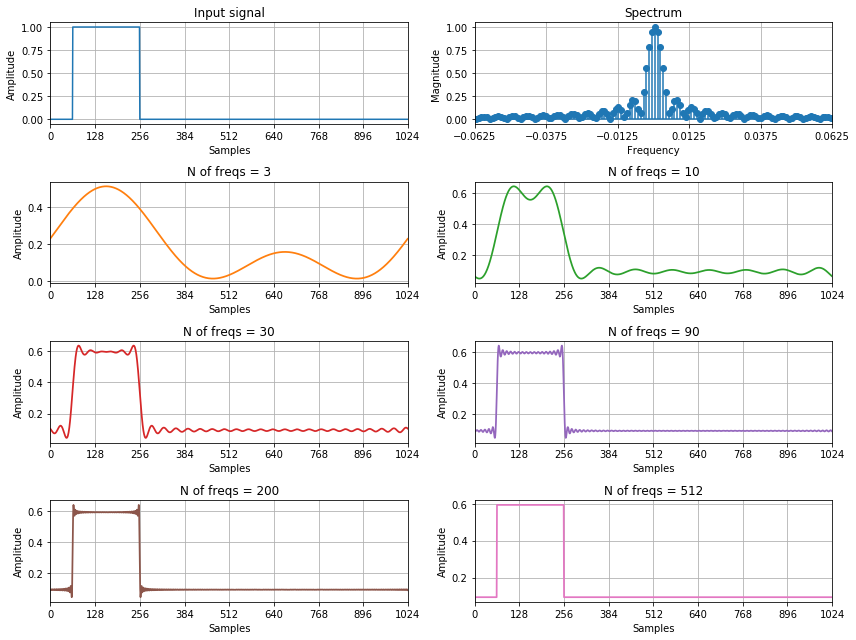

In [10]:
N = 1024
# Create input signal 
x = np.zeros(N)
x[64:256] = 1

# Find Forward FFT
X = fft(x, N)
# Normalized shifted spectrum
Xs = fftshift(np.abs(X))
Xs /= np.max(Xs)
# Normalized frequency
f = np.linspace(-0.5, 0.5, N, endpoint=True)

# Plot input signal in time domain
plt.figure(figsize=(12, 9))
plt.subplot(4, 2, 1)
plt.plot(x)
plt.title('Input signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim([0, N-1])
plt.xticks(np.linspace(0, N, 9, endpoint=True))
plt.grid()

# Plot signal in freq domain
plt.subplot(4, 2, 2)
plt.stem(f, Xs, use_line_collection=True, basefmt='C0')
plt.title('Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim([-1/16, 1/16])
plt.xticks(np.linspace(-1/16, 1/16, 6, endpoint=True))
plt.grid()

# Set the list - number of harmonics
l_freqs = (3, 10, 30, 90, 200, N//2)

# Plot signal with several
for i, j in enumerate(l_freqs):
    plt.subplot(4, 2, i+3)
    K = X.copy()
    K[j:] = 0
    k = np.real(ifft(K))
    plt.plot(k, color='C'+str(i+1), linewidth=1.75)
    plt.title(f'N of freqs = {j}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, N-1])
    plt.xticks(np.linspace(0, N, 9, endpoint=True))
    plt.grid()
plt.tight_layout()
plt.savefig("fig1_gibbs.png")

### Эффект Гиббса

Вносимые пульсации в области резких перепадов сигнала связаны с **эффектом Гиббса**. Этот эффект связан с последовательным приближением к исходной форме в виде частичных сумм ряда Фурье. Иными словами, природа пульсаций в восстанавливаемом сигнале напрямую связана с эффекта Гиббса.  Эффект Гиббса ярко выражен при резких нарушениях монотонности функции. На резких перепадах и скачках этот эффект максимален.

На рисунке ниже представлен график восстановления линейного сигнала с помощью частичной суммы ряда Фурье при разных значениях количества суммарных отсчетов.

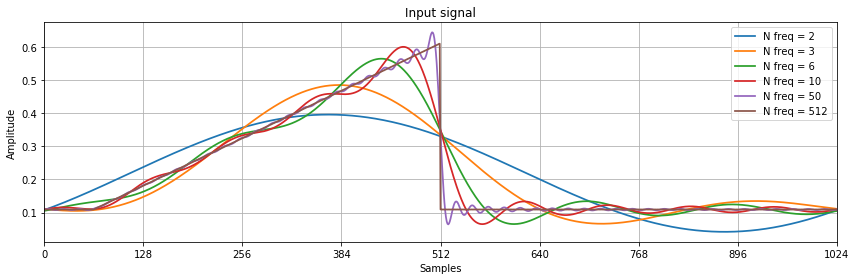

In [11]:
N = 1024
# Create input signal 
x = np.zeros(N)
x[64:512] = np.linspace(0, 1, 512-64)

# Find Forward FFT
X = fft(x, N)

# Set the list - number of harmonics
l_freqs = (2, 3, 6, 10, 50, N//2)

# Plot signal with several
plt.figure(figsize=(12, 4))
plt.title('Input signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim([0, N-1])
plt.xticks(np.linspace(0, N, 9, endpoint=True))
for i, j in enumerate(l_freqs): 
    K = X.copy()
    K[j:] = 0
    k = np.real(ifft(K))
    plt.plot(k, color='C'+str(i), linewidth=1.75, label='N freq = {}'.format(l_freqs[i]))
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("fig2_gibbs.png")